В цьому ДЗ ми потренуємось будувати візуалізації з використанням бібліотеки `maplotlib` для візуалізації даних в `pandas.DataFrame`.

# Опис бізнес задачі та набору даних

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

1. Завантажте дані з файла `yulu_rental.csv` у pandas.DataFrame `df`.

In [2]:
df = pd.read_csv('../data/yulu_rental.csv')

2. Виведіть

- перші 3 записи з набору даних
- типи даних в наборі даних
- розміри набору даних

In [3]:
display(df.head(3), df.dtypes,  df.shape)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

(10886, 12)

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.
Наша колонка тепер стане таймпстемпом і для неї став доступний функціонал, описаний тут

https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html

Наприклад, ми можемо легко виокремити дату, день тижня, чи це робочий день, чи ні.

In [4]:
df['datetime'] = pd.to_datetime(df.datetime)

3. З допомогою matplotlib побудуйте найпростіший лінійний графік кількості зареєстрованих користувачів (`registered`) на кожну годину.

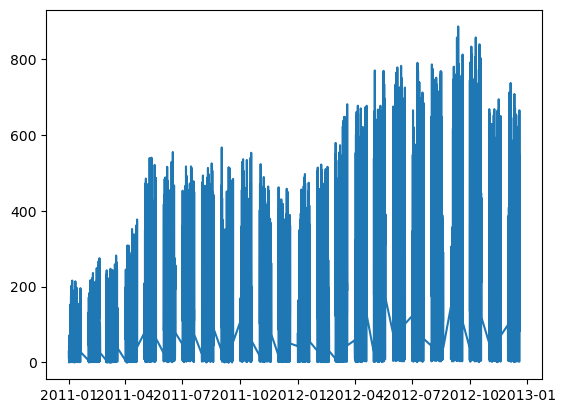

In [5]:
plt.plot(df.datetime, df.registered);

Має вийти щось таке:
![](https://drive.google.com/uc?export=view&id=1WX6s9qmiwq_1TSHQtRX0bPL8sT6Gw2BH)

4. Графік виглядає так собі, правда? Давайте загрегуємо дані по дням. Для цього запустіть наступний код аби створити колонку "дата" (без часу) і після цього напишіть самостійно код, аби загрегувати дані і отримати кількість зарестрованих клієнтів на день. Ваша фінальна структура (запишіть її в змінну `df_registered_by_date`) даних має містити дві колонки: дату і кількість зареєстрованих користувачів на цей день.

In [6]:
df['date'] = df.datetime.dt.date

In [7]:
df_registered_by_date = df.groupby('date')['registered'].sum().reset_index()
df_registered_by_date.head()

,date,registered
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1DL7Y-R7_CBWNlQNAnMyAoU8hR2MdF5v7)


5. Тепер побудуйте лінійний графік з matplotlib для даних в `df_registered_by_date`.

  Додайте наступну частину до графіку аби зробити підписи за віссю ОХ більш читаємими

  `plt.xticks(rotation=45, ha='right')`

  Після побудови графіку проаналізуйте його та напишіть, які тенденції щодо зміни кількості зареєстрованих користувачів в часі ви бачите і чому так може бути?

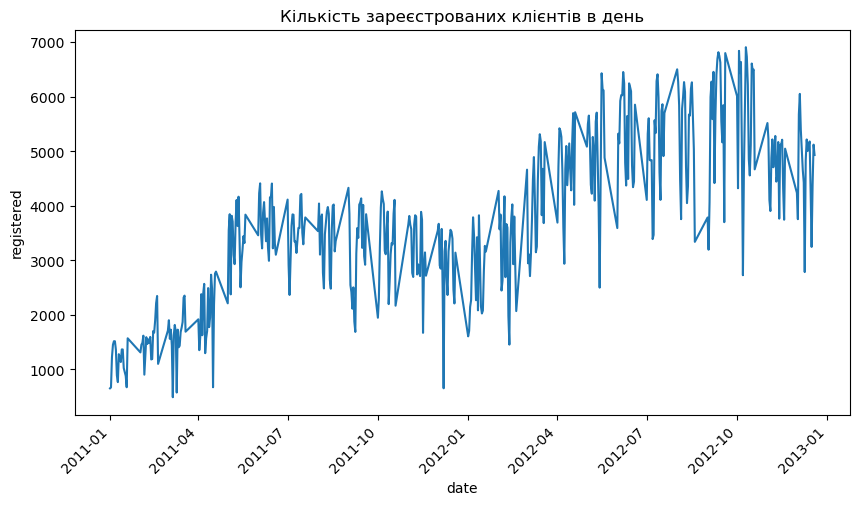

In [8]:
plt.figure(figsize=(10, 5))
x = df_registered_by_date.date
y = df_registered_by_date.registered
plt.title('Кількість зареєстрованих клієнтів в день')
plt.xlabel('date')
plt.ylabel('registered')
plt.xticks(rotation=45, ha='right')
plt.plot(x, y);

6. Побудуйте графік розсіювання (scatterplot) між температурою і тим, як вона відчувається (atemp). Поставте прозорість точок 0.2. Додайте підписи до осей Х ат У. Опишіть свої спостереження з цього графіку. Які висновки можна зробити? Що дивного бачите?

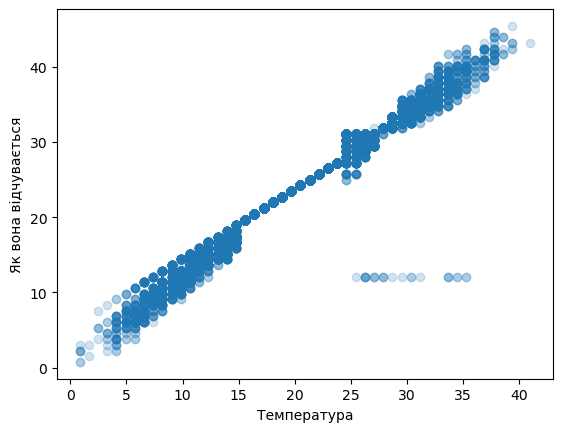

In [9]:
plt.scatter(df.temp, df.atemp, alpha=0.2)
plt.xlabel('Температура')
plt.ylabel('Як вона відчувається');

  Очікуваний графік:
![](https://drive.google.com/uc?export=view&id=13Mi6AGPUh5aQ5YEZjrlkQPuFcNzeeppB)


Між температурою та відчуттям температури спостерігається майже ідеальний лінійний зв’язок. Це означає, що зі збільшенням фактичної температури, відчуття температури також зростає майже прямо пропорційно.

На графіку є горизонтальні "смуги". Це може бути наслідком округлення або дискретизації значень температури, за якими було розраховано "відчуття температури". Деякі точки розташовані не вздовж основної прямої, а на окремих рівнях (наприклад, при температурах близько 25-35°C). Це може вказувати на певні аномалії в даних або методах їх обробки.

Також прозорість точок дозволяє побачити ділянки з високою щільністю.